# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import datetime

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
df = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [4]:
# Your code here
df.head(20)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,11,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,0,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,0,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,0,0,0,0,2,1,62,146,2,2.0,1


In [5]:
df.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [6]:
df["Type"].value_counts()

0    1565
1     216
Name: Type, dtype: int64

### Your comment here

All the data types make sense. Our target variable is "Type". "1" is code for malicious, whereas "0" is code for benign. The charset and Server columns need to be coded.


#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

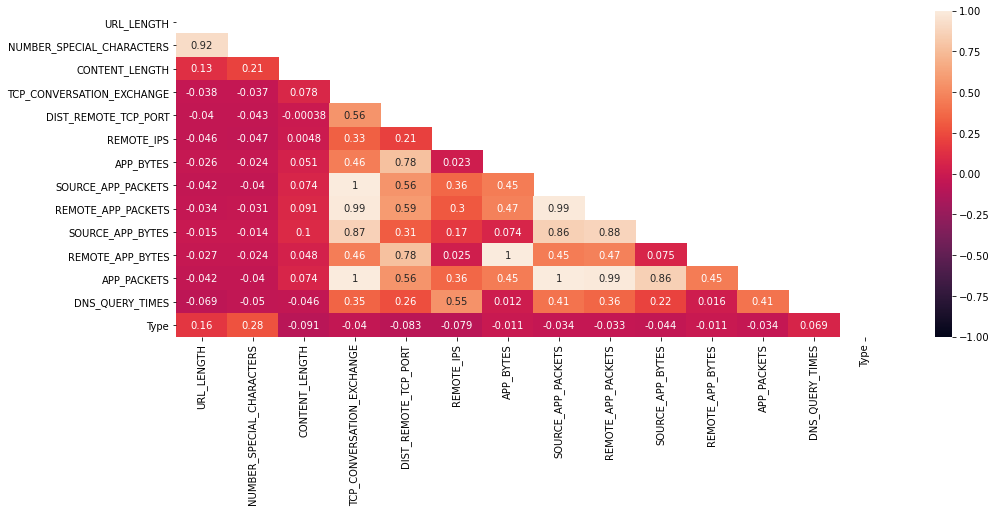

In [8]:
# Your code here
# Compute the correlation matrix

plt.figure(figsize=(16, 6))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True,vmin=-1,vmax=1,mask=mask);


### Your comment here
There is a high degree of collinearity among several columns.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [9]:
df.drop(["TCP_CONVERSATION_EXCHANGE","APP_PACKETS","REMOTE_APP_PACKETS","APP_BYTES"], axis="columns",inplace=True)

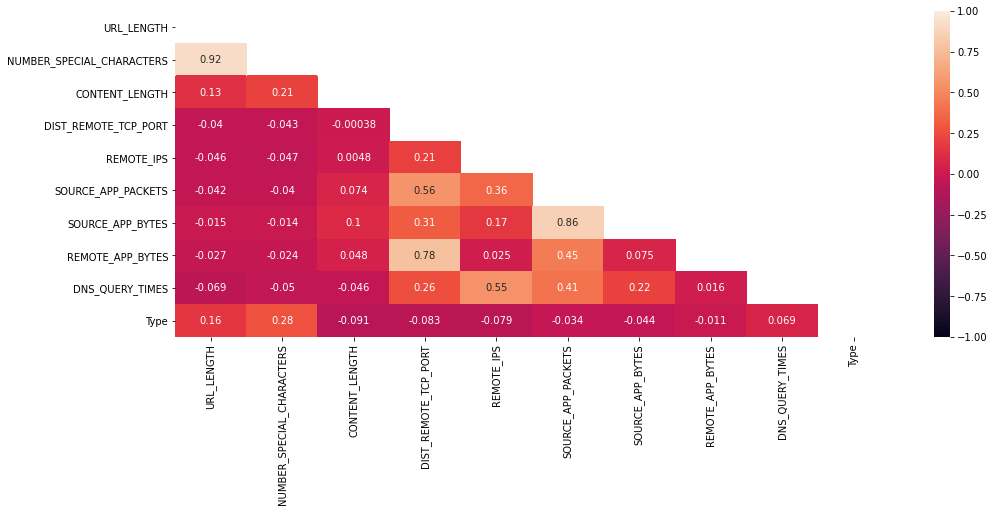

In [10]:
# Print heatmap again
# Your code here
plt.figure(figsize=(16, 6))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True,vmin=-1,vmax=1,mask=mask);

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [11]:
# Your code here
df.isna().sum()*100/len(df)

URL                           0.000000
URL_LENGTH                    0.000000
NUMBER_SPECIAL_CHARACTERS     0.000000
CHARSET                       0.000000
SERVER                        0.056148
CONTENT_LENGTH               45.592364
WHOIS_COUNTRY                 0.000000
WHOIS_STATEPRO                0.000000
WHOIS_REGDATE                 0.000000
WHOIS_UPDATED_DATE            0.000000
DIST_REMOTE_TCP_PORT          0.000000
REMOTE_IPS                    0.000000
SOURCE_APP_PACKETS            0.000000
SOURCE_APP_BYTES              0.000000
REMOTE_APP_BYTES              0.000000
DNS_QUERY_TIMES               0.056148
Type                          0.000000
dtype: float64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [12]:
# Your code here
df.drop("CONTENT_LENGTH",axis="columns",inplace=True)

In [13]:
missing_values=df[df.isnull().any(axis=1)]
missing_values

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
1306,B0_2134,66,11,UTF-8,NaN,US,District of Columbia,1/02/2003 16:44,2/02/2017 17:11,2,4,15,246,1026,0.0,0
1659,B0_772,101,15,UTF-8,Apache,CA,ON,14/12/2009 0:00,13/12/2016 0:00,2,2,4,416,276,NaN,0


In [14]:
df.dropna(axis=0,inplace=True)
df=df.reset_index(drop=True)

In [15]:
missing_values=df[df.isnull().any(axis=1)]
missing_values

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type


### Your comment here
We drop the CONTENT_LEGTH column because 45% of the values are missing. Moreover we drop the missing rows, as there are only two.

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [16]:
# Examine missing values in each column
# Your code here
df.isna().sum()*100/len(df)

URL                          0.0
URL_LENGTH                   0.0
NUMBER_SPECIAL_CHARACTERS    0.0
CHARSET                      0.0
SERVER                       0.0
WHOIS_COUNTRY                0.0
WHOIS_STATEPRO               0.0
WHOIS_REGDATE                0.0
WHOIS_UPDATED_DATE           0.0
DIST_REMOTE_TCP_PORT         0.0
REMOTE_IPS                   0.0
SOURCE_APP_PACKETS           0.0
SOURCE_APP_BYTES             0.0
REMOTE_APP_BYTES             0.0
DNS_QUERY_TIMES              0.0
Type                         0.0
dtype: float64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [17]:
# Your code here
print(df["WHOIS_COUNTRY"].value_counts().count())
df["WHOIS_COUNTRY"].value_counts()

49


US                1102
None               306
CA                  83
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
CN                  10
IN                  10
UK                  10
FR                   9
CZ                   9
NL                   6
CH                   6
KR                   5
[u'GB'; u'UK']       5
BS                   4
ru                   4
AT                   4
PH                   4
KY                   3
SE                   3
us                   3
HK                   3
SC                   3
DE                   3
BE                   3
TR                   3
RU                   2
IL                   2
UY                   2
NO                   2
UA                   2
Cyprus               2
KG                   2
BR                   2
SI                   2
United Kingdom       1
PK                   1
se                   1
BY                   1
AE                   1
LU         

In [19]:
print(df["WHOIS_COUNTRY"].value_counts().count())
df["WHOIS_COUNTRY"].value_counts()
df_country_fix=df
df_country_fix["WHOIS_COUNTRY"]=df["WHOIS_COUNTRY"].replace({"Cyprus":"CY","us":"US","se":"SE","United Kingdom":"UK","Ru":"RU","ru":"RU"}, regex=True)

45


In [20]:
df_country_fix["WHOIS_COUNTRY"].replace("[u'GB'; u'UK']","UK",inplace=True)

In [21]:
df_country_fix["WHOIS_COUNTRY"].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

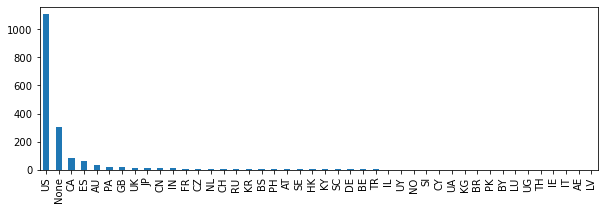

In [22]:
plt.figure(figsize=(10,3))
df_country_fix["WHOIS_COUNTRY"].value_counts().plot.bar()
plt.show()

**We don't do this manually. We make sure that we can reproduce the process by sorting the countries by count and saving the value of the 10th country into a variable called "threshold".**

In [24]:
#We create a variable to identify the 10th highest count.
threshold=df_country_fix["WHOIS_COUNTRY"].value_counts()[9]
threshold

10

**We then bin any country with a value below the threshold into a value called "Other".**

In [25]:
# Your code here
s=df_country_fix["WHOIS_COUNTRY"].value_counts()
df_other=df_country_fix
df_other["WHOIS_COUNTRY"]=np.where(df_other["WHOIS_COUNTRY"].isin(s.index[s > threshold]), df_other["WHOIS_COUNTRY"], 'Other')

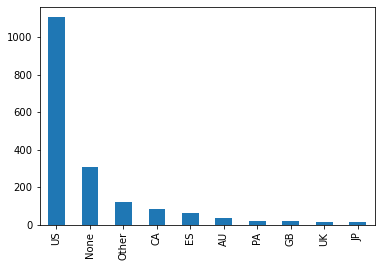

In [27]:
df_other["WHOIS_COUNTRY"].value_counts().plot.bar()

**We also drop `WHOIS_STATEPRO`, since provinces are not relevant now that we have relabelled countries.**

**Moreover, we drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`, since the registration and update dates of each domain are not relevant.**

In [28]:
# Your code here
df_other.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis="columns",inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [30]:
# Your code here
df_other.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [31]:
# Your code here
df_other.drop("URL", axis="columns",inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [32]:
# Your code here
df_other["CHARSET"].value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [33]:
# Your code here
df_other["SERVER"].value_counts()

Apache                                                                        385
nginx                                                                         211
None                                                                          175
Microsoft-HTTPAPI/2.0                                                         113
cloudflare-nginx                                                               94
                                                                             ... 
Apache/2.4.6 (Unix) mod_jk/1.2.37 PHP/5.5.1 OpenSSL/1.0.1g mod_fcgid/2.3.9      1
mw2113.codfw.wmnet                                                              1
mw2097.codfw.wmnet                                                              1
Resin/3.1.8                                                                     1
nginx/1.10.0 (Ubuntu)                                                           1
Name: SERVER, Length: 239, dtype: int64

In [35]:
df_other["SERVER"].value_counts()
df_other["SERVER"].value_counts()/len(df_other)

Apache                                                                        0.216414
nginx                                                                         0.118606
None                                                                          0.098370
Microsoft-HTTPAPI/2.0                                                         0.063519
cloudflare-nginx                                                              0.052839
                                                                                ...   
Apache/2.4.6 (Unix) mod_jk/1.2.37 PHP/5.5.1 OpenSSL/1.0.1g mod_fcgid/2.3.9    0.000562
mw2113.codfw.wmnet                                                            0.000562
mw2097.codfw.wmnet                                                            0.000562
Resin/3.1.8                                                                   0.000562
nginx/1.10.0 (Ubuntu)                                                         0.000562
Name: SERVER, Length: 239, dtype: float64

In [36]:
#We print the percentage of all apache servers and all rows that have them.

print(len(df_other[df_other["SERVER"].str.contains("Apache")==True])/len(df_other))
df_other[df_other["SERVER"].str.contains("Apache")==True]

0.3608768971332209


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
1,16,6,UTF-8,Apache/2.4.10,None,7,4,17,1265,1230,0.0,0
6,18,6,iso-8859-1,Apache/2,US,0,3,14,8559,1327,2.0,0
10,20,6,utf-8,Apache,US,0,0,0,0,0,0.0,0
14,20,7,ISO-8859-1,Apache/2.2.15 (Red Hat),None,0,0,0,0,0,0.0,0
15,21,7,ISO-8859-1,Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...,UK,0,1,11,1960,1011,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1771,178,16,UTF-8,Apache,ES,0,0,0,186,0,0.0,1
1773,194,17,UTF-8,Apache,ES,0,0,0,186,0,0.0,1
1774,194,16,UTF-8,Apache,ES,0,0,0,186,0,0.0,1
1775,198,17,UTF-8,Apache,ES,0,0,0,124,0,0.0,1


In [37]:
#We do the same for nginx and Microsoft
print("nginx: " + str(len(df_other[df_other["SERVER"].str.contains("nginx")==True])/len(df_other)))
print("Microsoft: " + str(len(df_other[df_other["SERVER"].str.contains("Microsoft")==True])/len(df_other)))

nginx: 0.24451939291736932
Microsoft: 0.11129848229342328


**Together, these three server types account for around 70% of the instances.**

In [38]:
df_other["SERVER"]

0                        nginx
1                Apache/2.4.10
2        Microsoft-HTTPAPI/2.0
3                        nginx
4                         None
                 ...          
1774                    Apache
1775                    Apache
1776    Apache/2.2.16 (Debian)
1777          cloudflare-nginx
1778         Microsoft-IIS/8.5
Name: SERVER, Length: 1779, dtype: object

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [39]:
#We'll create a loop to replace each value.
servers=["Apache","nginx","Microsoft"]
for s in servers:
    for i in range(len(df_other)):
        if s in df_other["SERVER"][i]:
            df_other["SERVER"][i]=s

<ipython-input-39-447c5733c296>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other["SERVER"][i]=s


In [40]:
for i in range(len(df_other)):
    for s in servers:
        if all(s not in df_other["SERVER"][i] for s in servers):
            df_other["SERVER"][i]="Other"

<ipython-input-40-15281b40d49f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other["SERVER"][i]="Other"


**Let's confirm that the changes are made and that the percentages have not shifted**

In [42]:
print(df_other["SERVER"].value_counts())
print(df_other["SERVER"].value_counts()/len(df_other))

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64
Apache       0.360877
Other        0.283305
nginx        0.244519
Microsoft    0.111298
Name: SERVER, dtype: float64


**Everything is in order**

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [43]:
# Your code here
df_dummy=pd.get_dummies(df_other,drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [44]:
# Your code here
df_dummy.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_ISO-8859-1             uint8
CHARSET_None                   uint8
CHARSET_UTF-8                  uint8
CHARSET_iso-8859-1             uint8
CHARSET_us-ascii               uint8
CHARSET_utf-8                  uint8
CHARSET_windows-1251           uint8
CHARSET_windows-1252           uint8
SERVER_Microsoft               uint8
SERVER_Other                   uint8
SERVER_nginx                   uint8
WHOIS_COUNTRY_CA               uint8
WHOIS_COUNTRY_ES               uint8
WHOIS_COUNTRY_GB               uint8
WHOIS_COUNTRY_JP               uint8
WHOIS_COUNTRY_None             uint8
WHOIS_COUNTRY_Other            uint8
WHOIS_COUNTRY_PA               uint8
W

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [46]:
#We split the data into testing and training sets. The target variable, "Type" goes into the Y variable, whereas the others, as predictors, go into the "X".

from sklearn.model_selection import train_test_split

# Your code here:
y=df_dummy["Type"]
x=df_dummy.drop(["Type"],axis="columns")
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2)
print(y_train.shape,y_test.shape)
x_train.shape,x_test.shape

(1423,) (356,)


((1423, 28), (356, 28))

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [51]:
# Your code here:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0,max_iter=10000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [52]:
# Your code here:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

Recall Score: 0.6122448979591837
Accuracy Score: 0.9269662921348315
F1 score: 0.6976744186046512
Cohen's Kappa score: 0.6570581696924787


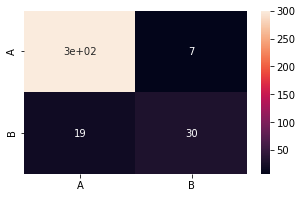

In [53]:
from sklearn import metrics

test_pred = log_reg.predict(x_test)

df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, test_pred), index = [i for i in "AB"], columns = [i for i in "AB"])
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True)

print("Recall Score: "+str(metrics.recall_score(y_test, test_pred)))
print("Accuracy Score: "+str(metrics.accuracy_score(y_test, test_pred)))
print("F1 score: "+str(metrics.f1_score(y_test, test_pred)))
print("Cohen's Kappa score: "+str(metrics.cohen_kappa_score(y_test, test_pred)))

The metrics we use to evaluate our model should always reflect our business question. As we saw earlier, the proportion of positive to negative results for the target variable is highly assymetrical: Far more websites are benign than malicious. Thus, accuracy, which is applied to symmetrical datasets, is not a good metric for our model. We will instead focus on Recall, which is useful when the cost of False Negatives is high. Intuitively, Recall measures the numer of correctly identified positive cases from all the actual positive cases. In our case, we will assume that the cost of missing a malicious website is higher than the cost of incorrecty identifying a benign one. The overall number of malicious websites is low, meaning that we can dedicate resources to analyze each website identified as malicious in detail before taking action. In addition to Recall, we'll also want to print the condusion matrix, which shows all clasifications, and COhen's Kappa score, which tells us whether our model can predict with greater accuracy than if the classifications were made by chance.

Though accuracy is high and Cohen's Kappa score is positive, we have an r^2 of only around 40%, far lower than it was on our training set. One way to fix this is by scaling our variables. Let's run the model again after using a standard scaler on our X sets. Note that we do not need to scale Y, since it contains a single categorical column with values of only 1 or 0.

In [54]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_x_train= sc_x.fit_transform(x_train)
sc_x_test= sc_x.fit_transform(x_test)
log_reg_sc=LogisticRegression(random_state=0,max_iter=10000)
log_reg_sc.fit(sc_x_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

Recall Score: 0.7346938775510204
Accuracy Score: 0.9438202247191011
F1 score: 0.782608695652174
Cohen's Kappa score: 0.7505080944705306


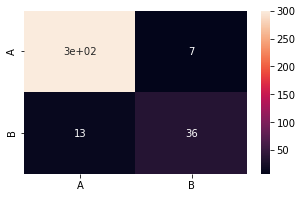

In [55]:
test_pred = log_reg_sc.predict(sc_x_test)

df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, test_pred), index = [i for i in "AB"], columns = [i for i in "AB"])
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True)

print("Recall Score: "+str(metrics.recall_score(y_test, test_pred)))
print("Accuracy Score: "+str(metrics.accuracy_score(y_test, test_pred)))
print("F1 score: "+str(metrics.f1_score(y_test, test_pred)))
print("Cohen's Kappa score: "+str(metrics.cohen_kappa_score(y_test, test_pred)))

**Our Recall score improved by 31%!. You can see that the number of false engatives decreased from 20 to 12. Moreover, our F1 score and Cohen's Kappa score also improved noticeably. Scaling our variables payed off.**

**Even so, let's see if we can get even better results. We'll try a different algorithm: K-Nearest Neighbors. We'll start with k=3. We'll run the algorithm with Euclidean distance, which is the default parameter (metric="minkowski",p=2). We´ll also run the model with scaled data from the start.**

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

Recall Score: 0.7142857142857143
Accuracy Score: 0.9438202247191011
F1 score: 0.7777777777777778
Cohen's Kappa score: 0.7459139247733924


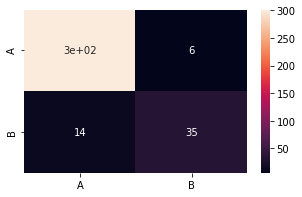

In [58]:
# KNN with 5 clusters.

kn_classifier_5=KNeighborsClassifier(n_neighbors=5)
kn_classifier_5.fit(sc_x_train,y_train)
kn_classifier_5.score(sc_x_train,y_train)

test_pred_k = kn_classifier_5.predict(sc_x_test)


df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, test_pred_k), index = [i for i in "AB"], columns = [i for i in "AB"])
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True)


print("Recall Score: "+str(metrics.recall_score(y_test, test_pred_k)))
print("Accuracy Score: "+str(metrics.accuracy_score(y_test, test_pred_k)))
print("F1 score: "+str(metrics.f1_score(y_test, test_pred_k)))
print("Cohen's Kappa score: "+str(metrics.cohen_kappa_score(y_test, test_pred_k)))



**Our Cohen's Kappa improves slightly, but our Recall decreased as well. Let's tune the number of clusters from 3 to 5**

#### We'll create another K-Nearest Neighbors model with k=3. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

Recall Score: 0.7755102040816326
Accuracy Score: 0.949438202247191
F1 score: 0.8085106382978723
Cohen's Kappa score: 0.7794451710607834


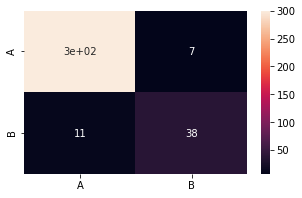

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# KNN wth 3 clusters.

kn_classifier=KNeighborsClassifier(n_neighbors=3)
kn_classifier.fit(sc_x_train,y_train)
kn_classifier.score(sc_x_train,y_train)

test_pred_k = kn_classifier.predict(sc_x_test)

df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, test_pred_k), index = [i for i in "AB"], columns = [i for i in "AB"])
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True)


print("Recall Score: "+str(metrics.recall_score(y_test, test_pred_k)))
print("Accuracy Score: "+str(metrics.accuracy_score(y_test, test_pred_k)))
print("F1 score: "+str(metrics.f1_score(y_test, test_pred_k)))
print("Cohen's Kappa score: "+str(metrics.cohen_kappa_score(y_test, test_pred_k)))



**We get a 9% increase in Recall score!**

In [60]:
for p in [1,2]:
    for w in ["uniform","distance"]:
        for k in range (1,51):
            kn_classifier=KNeighborsClassifier(n_neighbors=k,weights=w,p=p)
            kn_classifier.fit(sc_x_train,y_train)
            test_pred_k = kn_classifier.predict(sc_x_test)
            print("Recall Score: "+str(metrics.recall_score(y_test, test_pred_k)))

Recall Score: 0.7755102040816326
Recall Score: 0.6938775510204082
Recall Score: 0.7959183673469388
Recall Score: 0.673469387755102
Recall Score: 0.7142857142857143
Recall Score: 0.6938775510204082
Recall Score: 0.7142857142857143
Recall Score: 0.6530612244897959
Recall Score: 0.6938775510204082
Recall Score: 0.673469387755102
Recall Score: 0.6938775510204082
Recall Score: 0.673469387755102
Recall Score: 0.6938775510204082
Recall Score: 0.6938775510204082
Recall Score: 0.6938775510204082
Recall Score: 0.6530612244897959
Recall Score: 0.6530612244897959
Recall Score: 0.5918367346938775
Recall Score: 0.5918367346938775
Recall Score: 0.5918367346938775
Recall Score: 0.5918367346938775
Recall Score: 0.5714285714285714
Recall Score: 0.5918367346938775
Recall Score: 0.5510204081632653
Recall Score: 0.5510204081632653
Recall Score: 0.5306122448979592
Recall Score: 0.5306122448979592
Recall Score: 0.5306122448979592
Recall Score: 0.5306122448979592
Recall Score: 0.5306122448979592
Recall Score:

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

# Your conclusions here:
Small improvement in accuracy from k=3 to k=5



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [38]:
# Your code here